In [37]:
#Importing Important Libraries

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D



In [38]:
dataset = pd.read_csv('https://raw.githubusercontent.com/Shreyas3108/house-price-prediction/master/kc_house_data.csv')

In [39]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [40]:
ones = pd.DataFrame(np.ones((dataset.shape[0],1)),columns=["bias"])

In [41]:
dataset = pd.concat([dataset,ones],axis=1)

## Analyzing Our Data

In [42]:
dataset.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
bias             0
dtype: int64

In [43]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bias
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,1.0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1.0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,1.0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,1.0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,1.0


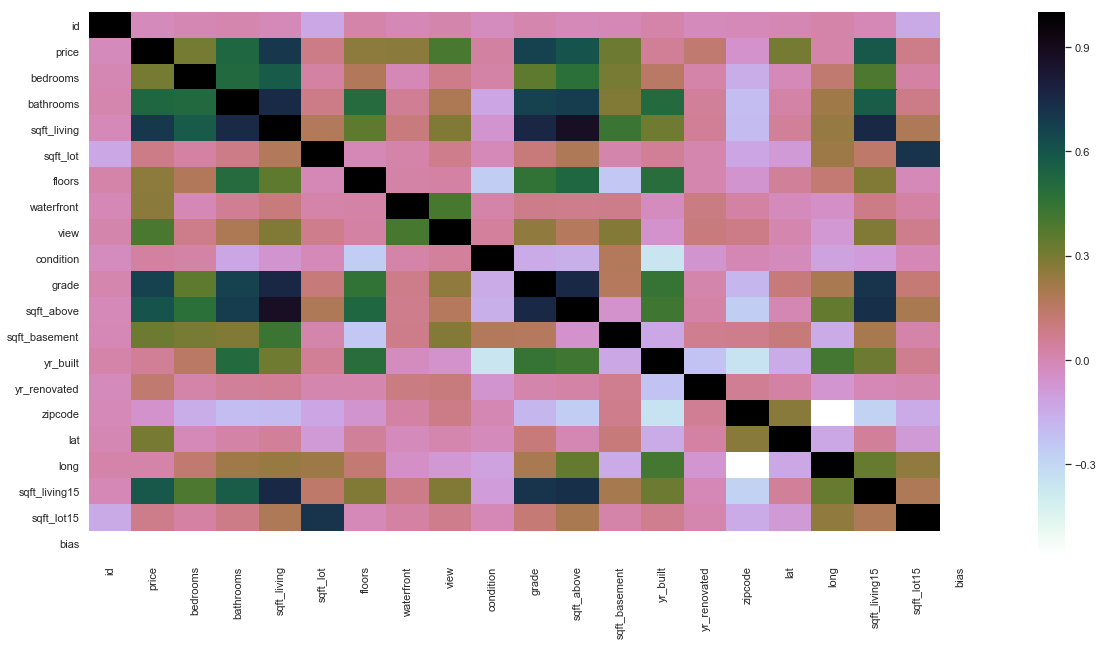

In [44]:
# Plotting heat map for analyzing correlation with house price
corr = dataset.corr()
sns.set(style='whitegrid',color_codes=True)
plt.xticks(rotation=90)
sns.heatmap(corr,cmap = plt.cm.cubehelix_r)

By plotting the heatmap we will get the idea that many features in the dataset have no relation with the price , so we can drop that features also 

In [45]:
dataset = dataset.drop(['id','date','yr_built','yr_renovated','zipcode','lat'],axis=1,inplace=False)

In [46]:
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,long,sqft_living15,sqft_lot15,bias
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,-122.257,1340,5650,1.0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,-122.319,1690,7639,1.0
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,-122.233,2720,8062,1.0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,-122.393,1360,5000,1.0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,-122.045,1800,7503,1.0


In [47]:
dataset.shape

(21613, 16)

## Splitting Our Data

In [48]:
trainingdatasize = int(0.25*dataset.shape[0])

In [49]:
trainingdata = dataset.iloc[0:trainingdatasize,:]

In [50]:
testingdata = dataset.iloc[trainingdatasize:,:]

## Normalize Our Data

In [51]:
trainingdata = np.array(trainingdata)

In [52]:
trainingdata = trainingdata/ trainingdata.max(axis = 0)

In [53]:
trainingdata = pd.DataFrame(trainingdata)

In [54]:
trainingdata.shape

(5403, 16)

In [55]:
labels = trainingdata[0]  #price column = 0

In [56]:
labels.shape

(5403,)

In [57]:
inputtrainingdata = trainingdata.drop([0],axis=1,inplace=False)

In [58]:
inputtrainingdata.shape

(5403, 15)

## Generate The Values of X,Y, and B

In [59]:
m = len(inputtrainingdata)
X = np.array(inputtrainingdata)
# Initial Coefficients
B = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
Y = np.array(labels)
alpha = 0.5

### Now Define Our Cost Function

In [60]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

In [61]:
inital_cost = cost_function(X, Y, B)
print(inital_cost)

0.004328669732240921


## Now Reduce The Error Using Gradient Descent Algorithm

In [62]:
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        # Hypothesis Values
        h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
        
    return B, cost_history

### Now we will Compute The Final Value of B

In [ ]:
# 100000 Iterations
newB, cost_history = gradient_descent(X, Y, B,alpha, 500000)

# New Values of B
print(newB)

# Final Cost of new B
print(cost_history[-1])

## Let’s calculate RMSE and R^2R Score of our model to evaluate.

In [ ]:
# Model Evaluation - RMSE
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

Y_pred = X.dot(newB)

print(rmse(Y, Y_pred))
print(r2_score(Y, Y_pred))

# The scikit-learn Approach

### scikit-learn approach is very similar to Simple Linear Regression Model and simple too. Let’s implement this.

In [29]:

x = trainingdata.drop([0],axis=1,inplace=False)

y = trainingdata[0]  #price column = 0

In [30]:

print(pd.DataFrame(x))
print(pd.DataFrame(y))


            1         2         3         4         5    6     7    8   \
0     0.333333  0.148148  0.117530  0.003421  0.285714  0.0  0.00  0.6   
1     0.333333  0.333333  0.255976  0.004385  0.571429  0.0  0.00  0.6   
2     0.222222  0.148148  0.076693  0.006056  0.285714  0.0  0.00  0.6   
3     0.444444  0.444444  0.195219  0.003028  0.285714  0.0  0.00  1.0   
4     0.333333  0.296296  0.167331  0.004893  0.285714  0.0  0.00  0.6   
5     0.444444  0.666667  0.539841  0.061725  0.285714  0.0  0.00  0.6   
6     0.333333  0.333333  0.170817  0.004129  0.571429  0.0  0.00  0.6   
7     0.333333  0.222222  0.105578  0.005881  0.285714  0.0  0.00  0.6   
8     0.333333  0.148148  0.177291  0.004524  0.285714  0.0  0.00  0.6   
9     0.333333  0.370370  0.188247  0.003972  0.571429  0.0  0.00  0.6   
10    0.333333  0.370370  0.354582  0.005932  0.285714  0.0  0.00  0.6   
11    0.222222  0.148148  0.115538  0.003633  0.285714  0.0  0.00  0.8   
12    0.333333  0.148148  0.142430  0.

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [33]:
# sc = StandardScaler()
# x_train = sc.fit_transform(x_train)
# x_test = sc.transform(x_test)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
y_pred = regressor.predict(x_test)

print(round(r2_score(y_test, y_pred)*100, 2), '%')

59.7 %
